In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
import warnings
warnings.filterwarnings("ignore")

# Processing and going through the database

In [292]:
df=pd.read_csv("train.csv")

In [293]:
print("Data set size : ", df.shape)

Data set size :  (45211, 11)


In [294]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [295]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [296]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [297]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


Checking whether the database is balanced

In [298]:
df['y'].value_counts()

,count
y,
no,39922
yes,5289


In [299]:
print('Percentage for "no": ',((39916) / (39916+5289)) * 100 )
print('Percentage for "yes": ',((5289) / (39916+5289)) * 100 )

Percentage for "no":  88.29996681782988
Percentage for "yes":  11.700033182170113


Identifying and Eliminating the NULL values

In [300]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education_qual,0
call_type,0
day,0
mon,0
dur,0
num_calls,0
prev_outcome,0


In [301]:
df.duplicated().sum()

np.int64(6)

In [302]:
df = df.drop_duplicates()

In [303]:
df.dtypes

,0
age,int64
job,object
marital,object
education_qual,object
call_type,object
day,int64
mon,object
dur,int64
num_calls,int64
prev_outcome,object


Identifying unique values in each attribute

In [304]:
print("Unique values of Job \n")
print(df['job'].unique())
print("\n")

print("Unique values of Marital Status \n")
print(df['marital'].unique())
print("\n")

print("Unique values of Educationsl Qualification \n")
print(df['education_qual'].unique())
print("\n")

print("Unique values of Call Type \n")
print(df['call_type'].unique())
print("\n")

print("Unique values of Month \n")
print(df['mon'].unique())
print("\n")

print("Unique values of Previous Outcome \n")
print(df['prev_outcome'].unique())
print("\n")

print("Unique values of Target Variable 'y' \n")
print(df['y'].unique())

Unique values of Job 

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


Unique values of Marital Status 

['married' 'single' 'divorced']


Unique values of Educationsl Qualification 

['tertiary' 'secondary' 'unknown' 'primary']


Unique values of Call Type 

['unknown' 'cellular' 'telephone']


Unique values of Month 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


Unique values of Previous Outcome 

['unknown' 'failure' 'other' 'success']


Unique values of Target Variable 'y' 

['no' 'yes']


Replacing categorical target data into numeric values

In [305]:
df['target'] = df["y"].map({"yes":1 , "no": 0})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0


# Calculating count for each attribute and comparing its percentage with the target, Changing unknown attribute to NULL and then dropping all the NULL values

### for age:

In [306]:
df.age.value_counts()

,count
age,
32,2084
31,1996
33,1972
34,1929
35,1894
...,...
95,2
93,2
92,2


In [307]:
df.groupby('age')['target'].mean()

,target
age,
18,0.583333
19,0.314286
20,0.300000
21,0.278481
22,0.310078
...,...
90,1.000000
92,1.000000
93,1.000000


### for job:

In [308]:
df.job.value_counts()

,count
job,
blue-collar,9730
management,9457
technician,7596
admin.,5170
services,4153
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


In [309]:
df.groupby('job')['target'].mean()

,target
job,
admin.,0.122050
blue-collar,0.072765
entrepreneur,0.082717
housemaid,0.087903
management,0.137570
retired,0.227915
self-employed,0.118429
services,0.088851
student,0.286780


In [310]:
df['job'] =df['job'].replace('unknown',np.nan)

In [311]:
df.job.isnull().sum()

np.int64(288)

In [312]:
df=df.dropna(subset=['job'])

In [313]:
df.job.isnull().sum()

np.int64(0)

### for marital status:

In [314]:
df.marital.value_counts()

,count
marital,
married,27007
single,12720
divorced,5190


In [315]:
df.groupby('marital')['target'].mean()

,target
marital,
divorced,0.119653
married,0.101233
single,0.149371


### for educational qualification:

In [316]:
df.education_qual.value_counts()

,count
education_qual,
secondary,23128
tertiary,13260
primary,6799
unknown,1730


In [317]:
df.groupby('education_qual')['target'].mean()

,target
education_qual,
primary,0.086483
secondary,0.105543
tertiary,0.150226
unknown,0.135260


In [318]:
print('Percentage for "Unknown": ',((1730) / (23202+13301+6851+1730)) * 100 )

Percentage for "Unknown":  3.8372815189424188


In [319]:
df['education_qual'] =df['education_qual'].replace('unknown',np.nan)
df.education_qual.isnull().sum()

np.int64(1730)

In [320]:
df = df. dropna(subset=['education_qual'])
df.education_qual.isnull().sum()

np.int64(0)

### for call type:

In [321]:
df.call_type.value_counts()

,count
call_type,
cellular,28210
unknown,12283
telephone,2694


In [322]:
df.groupby('call_type')['target'].mean()

,target
call_type,
cellular,0.147572
telephone,0.129918
unknown,0.041358


In [323]:
print('Percentage for "Unknown": ',((12283) / (29285+13020+12283)) * 100 )

Percentage for "Unknown":  22.501282333113505


### for day of the month:

In [324]:
df.day.value_counts()

,count
day,
20,2628
18,2227
21,1961
17,1872
6,1817
5,1796
14,1784
8,1758
28,1739


In [325]:
df.groupby('day')['target'].mean()

,target
day,
1,0.278689
2,0.139179
3,0.166506
4,0.160350
5,0.114143
6,0.094111
7,0.086832
8,0.105802
9,0.113284


### for month:

In [326]:
df.mon.value_counts()

,count
mon,
may,13191
jul,6600
aug,6035
jun,4978
nov,3842
apr,2820
feb,2533
jan,1318
oct,690


In [327]:
df.groupby('mon')['target'].mean()

,target
mon,
apr,0.192553
aug,0.109196
dec,0.465000
feb,0.165022
jan,0.100152
jul,0.088788
jun,0.105062
mar,0.537946
may,0.067319


### for duration of the call:

In [328]:
df.dur.value_counts()

,count
dur,
124,176
90,172
89,172
114,172
122,169
...,...
1608,1
1833,1
1545,1


In [329]:
df.groupby('dur')['target'].mean()

,target
dur,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3366,0.0
3422,0.0
3785,0.0


### for number of calls:

In [330]:
df.num_calls.value_counts()

,count
num_calls,
1,16740
2,11936
3,5277
4,3397
5,1703
6,1234
7,696
8,516
9,307


In [331]:
df.groupby('num_calls')['target'].mean()

,target
num_calls,
1,0.145221
2,0.110841
3,0.111237
4,0.088902
5,0.079859
6,0.072123
7,0.064655
8,0.058140
9,0.065147


### for previous outcome of success:

In [332]:
df.prev_outcome.value_counts()

,count
prev_outcome,
unknown,35280
failure,4709
other,1774
success,1424


In [333]:
df.groupby('prev_outcome')['target'].mean()

,target
prev_outcome,
failure,0.124655
other,0.165163
success,0.643961
unknown,0.091383


In [334]:
print('Percentage for "Unknown": ',((35280) / (35280+4709+1774+1424)) * 100 )

Percentage for "Unknown":  81.69124968161715


### for attribute column Y:

In [335]:
df.y.value_counts()

,count
y,
no,38166
yes,5021


In [336]:
#Checking Final dataframe, with no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43187 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43187 non-null  int64 
 1   job             43187 non-null  object
 2   marital         43187 non-null  object
 3   education_qual  43187 non-null  object
 4   call_type       43187 non-null  object
 5   day             43187 non-null  int64 
 6   mon             43187 non-null  object
 7   dur             43187 non-null  int64 
 8   num_calls       43187 non-null  int64 
 9   prev_outcome    43187 non-null  object
 10  y               43187 non-null  object
 11  target          43187 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


# Outlier detection and correction by either stirp(clip function) or complete deletion

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43187 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43187 non-null  int64 
 1   job             43187 non-null  object
 2   marital         43187 non-null  object
 3   education_qual  43187 non-null  object
 4   call_type       43187 non-null  object
 5   day             43187 non-null  int64 
 6   mon             43187 non-null  object
 7   dur             43187 non-null  int64 
 8   num_calls       43187 non-null  int64 
 9   prev_outcome    43187 non-null  object
 10  y               43187 non-null  object
 11  target          43187 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


### for age:

<Axes: xlabel='age'>

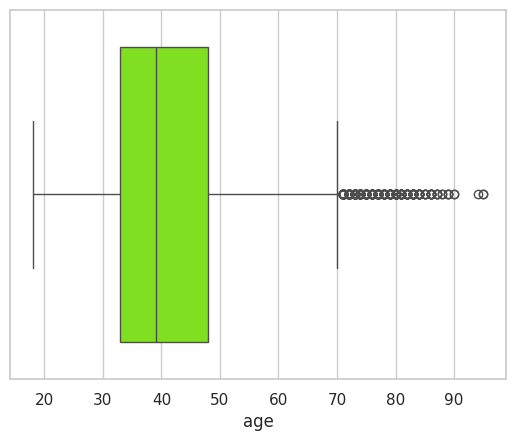

In [338]:
#plotting boxplot to visualize presence of outliers
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='Chartreuse')

In [339]:
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


In [340]:
df.age = df.age.clip(10.5,70.5)

In [341]:
df.age.describe()

,age
count,43187.000000
mean,40.702549
std,10.305239
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,70.500000


<Axes: xlabel='age'>

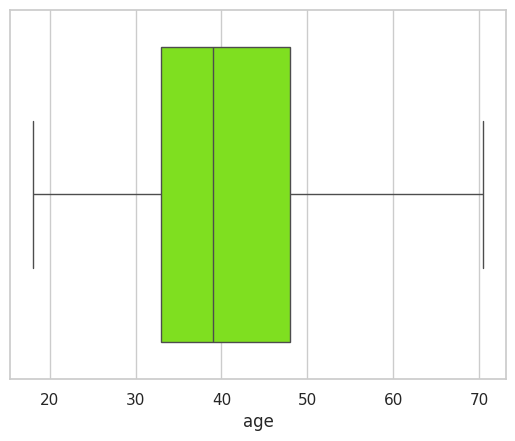

In [342]:
#boxplot after outlier correction
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='Chartreuse')

### for day:

<Axes: xlabel='day'>

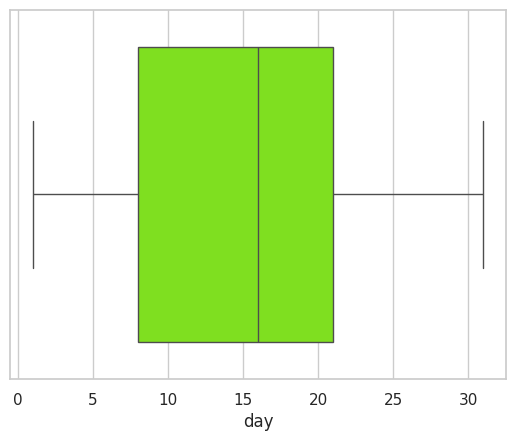

In [343]:
sns.set(style="whitegrid")
sns.boxplot(x=df['day'], color='Chartreuse')

In [344]:
q1,q3=np.percentile(df["day"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 40.5 Lower bound : -11.5


In [345]:
df.day.describe()

,day
count,43187.000000
mean,15.809896
std,8.305826
min,1.000000
25%,8.000000
50%,16.000000
75%,21.000000
max,31.000000


### for duration of call:

<Axes: ylabel='dur'>

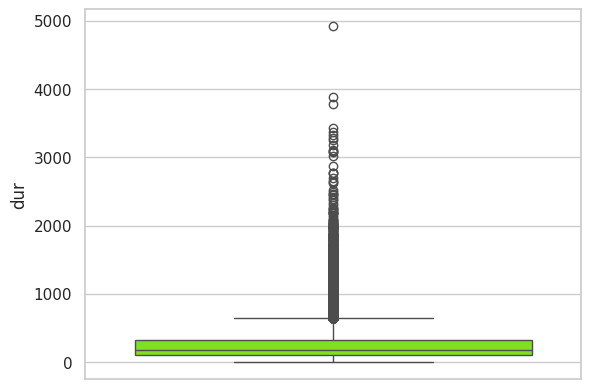

In [346]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='Chartreuse')

In [347]:
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 640.5 Lower bound : -219.5


In [348]:
df.dur = df.dur.clip(-219.5,640.5)

In [349]:
df.dur.describe()

,dur
count,43187.000000
mean,234.788038
std,176.240001
min,0.000000
25%,103.000000
50%,180.000000
75%,318.000000
max,640.500000


<Axes: ylabel='dur'>

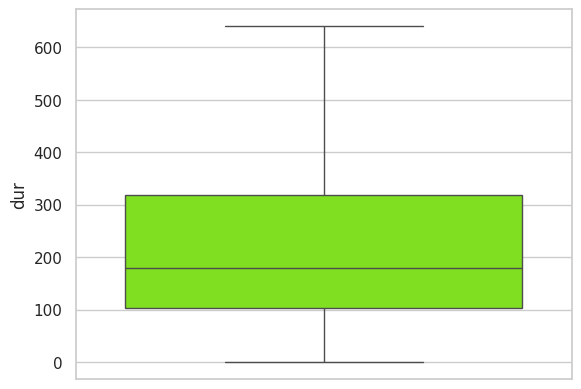

In [350]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='Chartreuse')

### for number of calls:

<Axes: ylabel='num_calls'>

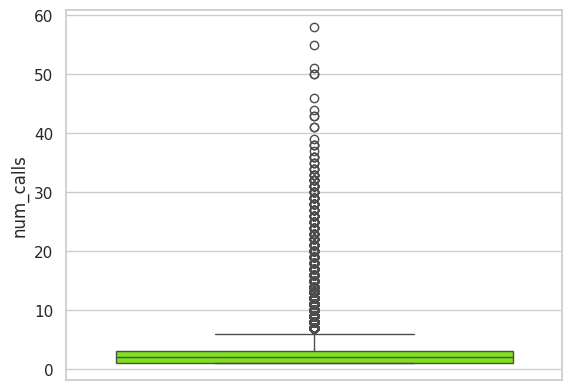

In [351]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='Chartreuse')

In [352]:
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [353]:
df.num_calls = df.num_calls.clip(-2,6.0)

In [354]:
df.num_calls.describe()

,num_calls
count,43187.000000
mean,2.393081
std,1.598892
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,6.000000


<Axes: ylabel='num_calls'>

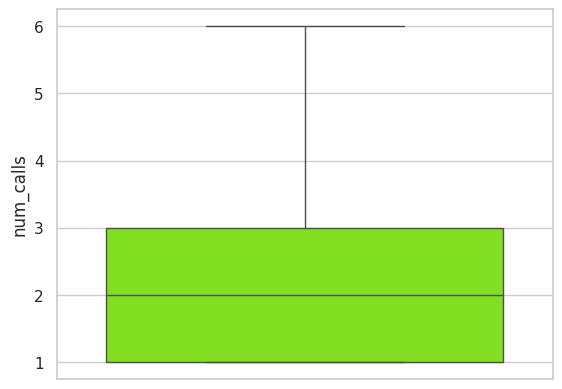

In [355]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='Chartreuse')

# EDA (exploratory Data Analysis) to identify issues and develop deeper understanding of relationship within variables

### Distribution graph of all numerical varibales with the count value

In [356]:
# Age distribution
plt.figure(figsize = (40,30),dpi=200)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.5, hspace=0.3)
plt.subplot(3,4,1)
sns.histplot((df.age),color='BlueViolet')

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['age']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Age Distribution', fontsize = 12, color='maroon', fontweight='bold')
plt.xlabel('Age',fontsize = 12, color='green')
plt.ylabel('Count',fontsize = 12, color='green')




#Job distribution
plt.subplot(3,4,2)
sns.countplot(df['job'],order=df.job.value_counts().index)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['job']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, ha='center', va='bottom', color='Purple')

plt.title('Job Distribution', fontsize = 14, color="maroon", fontweight='bold')
plt.xlabel('Type Of Job',fontsize = 12, color='green')
# plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')



# Marital distribution
plt.subplot(3,4,3)
custom_colors = {'married': 'Magenta', 'divorced': 'BlueViolet', 'single': 'Lime'}
sns.countplot(df['marital'],order=df.marital.value_counts().index, palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['marital']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Marital Status Distribution', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Marital',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')



# Education qualification distribution
plt.subplot(3,4,4)
custom_colors = {'secondary': 'DarkGreen', 'tertiary': 'LightSeaGreen', 'primary': 'Aquamarine'}
sns.countplot(df['education_qual'],order=df.education_qual.value_counts().index, palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['education_qual']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Education Qualification', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Education',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')




# Call type distribution
plt.subplot(3,4,5)
custom_colors = {'cellular': 'MediumVioletRed', 'telephone': 'purple', 'unknown' :'MediumSpringGreen'}
sns.countplot(df['call_type'],order=df.call_type.value_counts().index, palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['call_type']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Call Type', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Call type',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')




# Day distribution
plt.subplot(3,4,6)
sns.histplot(df['day'], color="Fuchsia")

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['day']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Day', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Day',fontsize = 12, color='green')
plt.xticks(rotation = 90,fontsize = 10)
plt.ylabel('Count',fontsize = 12, color='green')




 # Mon distribution
plt.subplot(3,4,7)
sns.countplot(df['mon'],order=df.mon.value_counts().index)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['mon']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Month', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Month',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')




# Dur distribution
plt.subplot(3,4,8)
sns.histplot((df.dur),color = 'cyan')

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['dur']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Duration', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Duration',fontsize = 12, color='green')
plt.ylabel('Count',fontsize = 12, color='green')




# Num call distribution
plt.subplot(3,4,9)
sns.histplot(df['num_calls'])

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['num_calls']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Number Of Calls', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Number Of Calls',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')


# Previous outcome distribution
plt.subplot(3,4,10)
custom_colors = {'unknown': 'HotPink', 'failure': 'Olive', 'other': 'Purple', 'success':'Yellow'}
sns.countplot(df['prev_outcome'],order=df.prev_outcome.value_counts().index, palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['prev_outcome']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Previous Outcome', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Previous Outcome',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')


 # Target distribution
plt.subplot(3,4,11)
custom_colors = {'no': 'GreenYellow', 'yes': 'Teal'}
sns.countplot(df['y'], palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['y']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Target Distribution', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Target Distribution',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')

# plt.tight_layout()


plt.show()

### Distribution graph of all numerical values with the target value

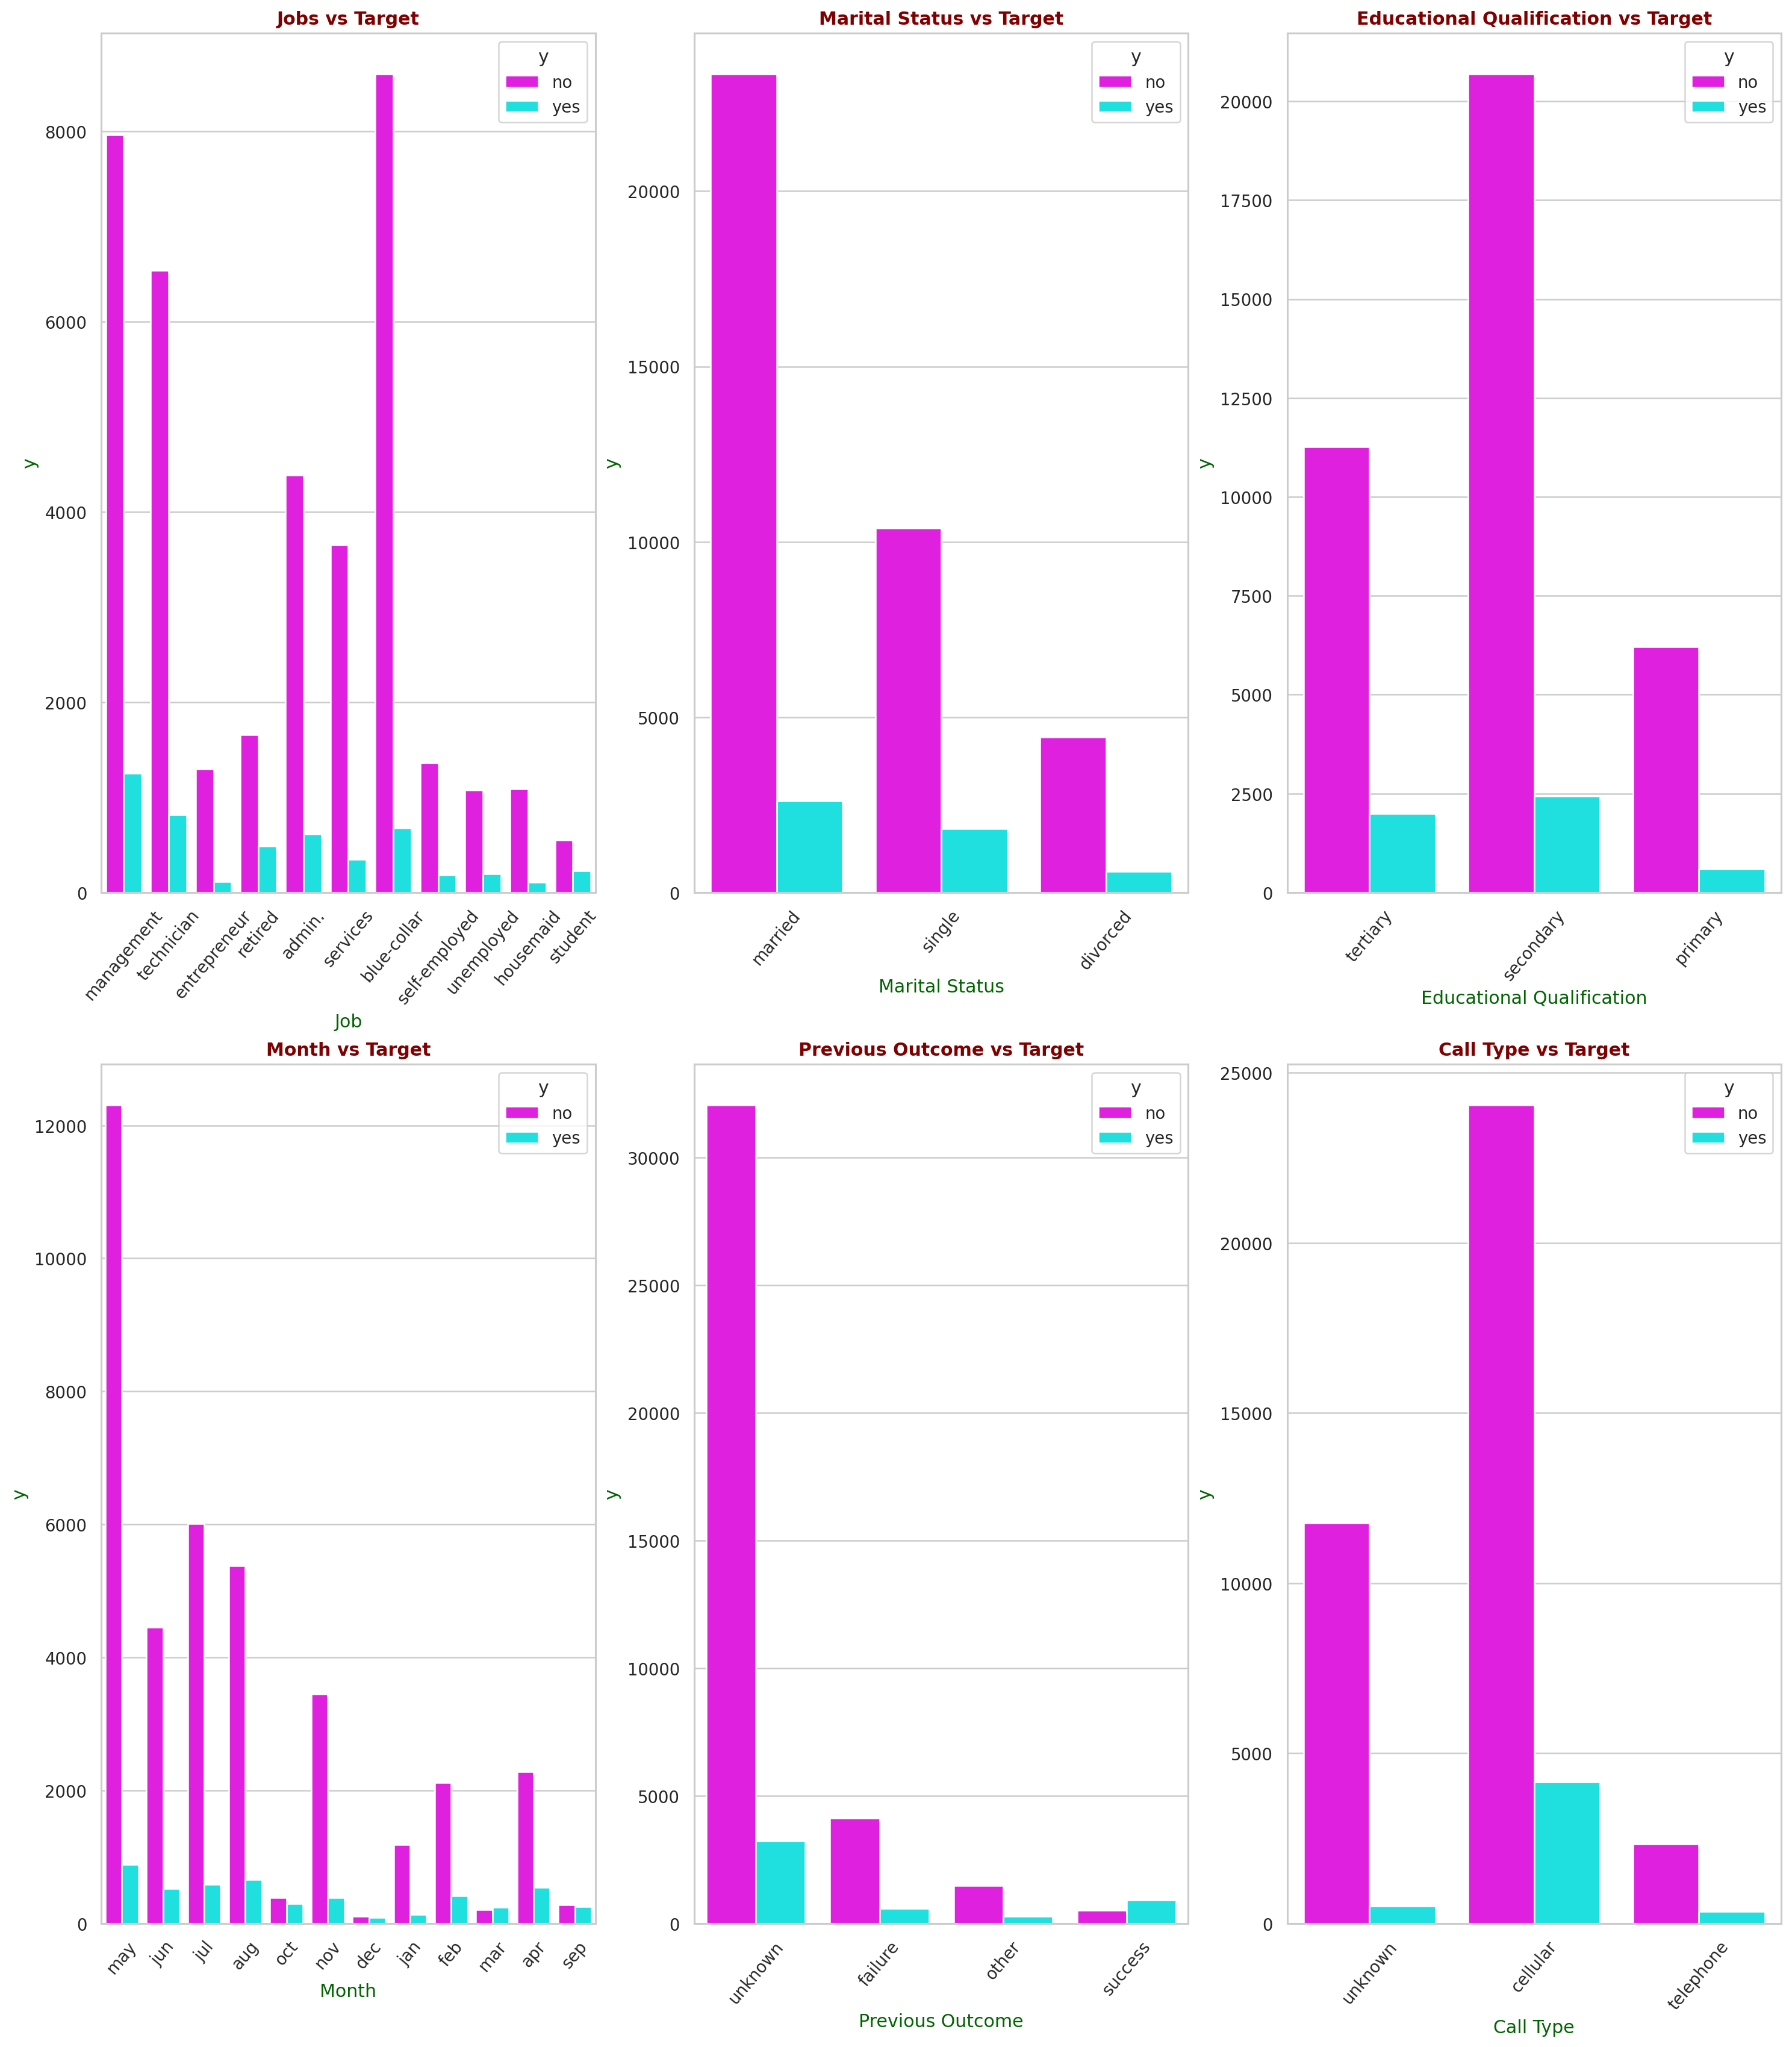

In [357]:
plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
plt.subplot(3,3,1)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='job',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='marital',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='education_qual',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='mon',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,5)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='prev_outcome',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,6)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='call_type',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()

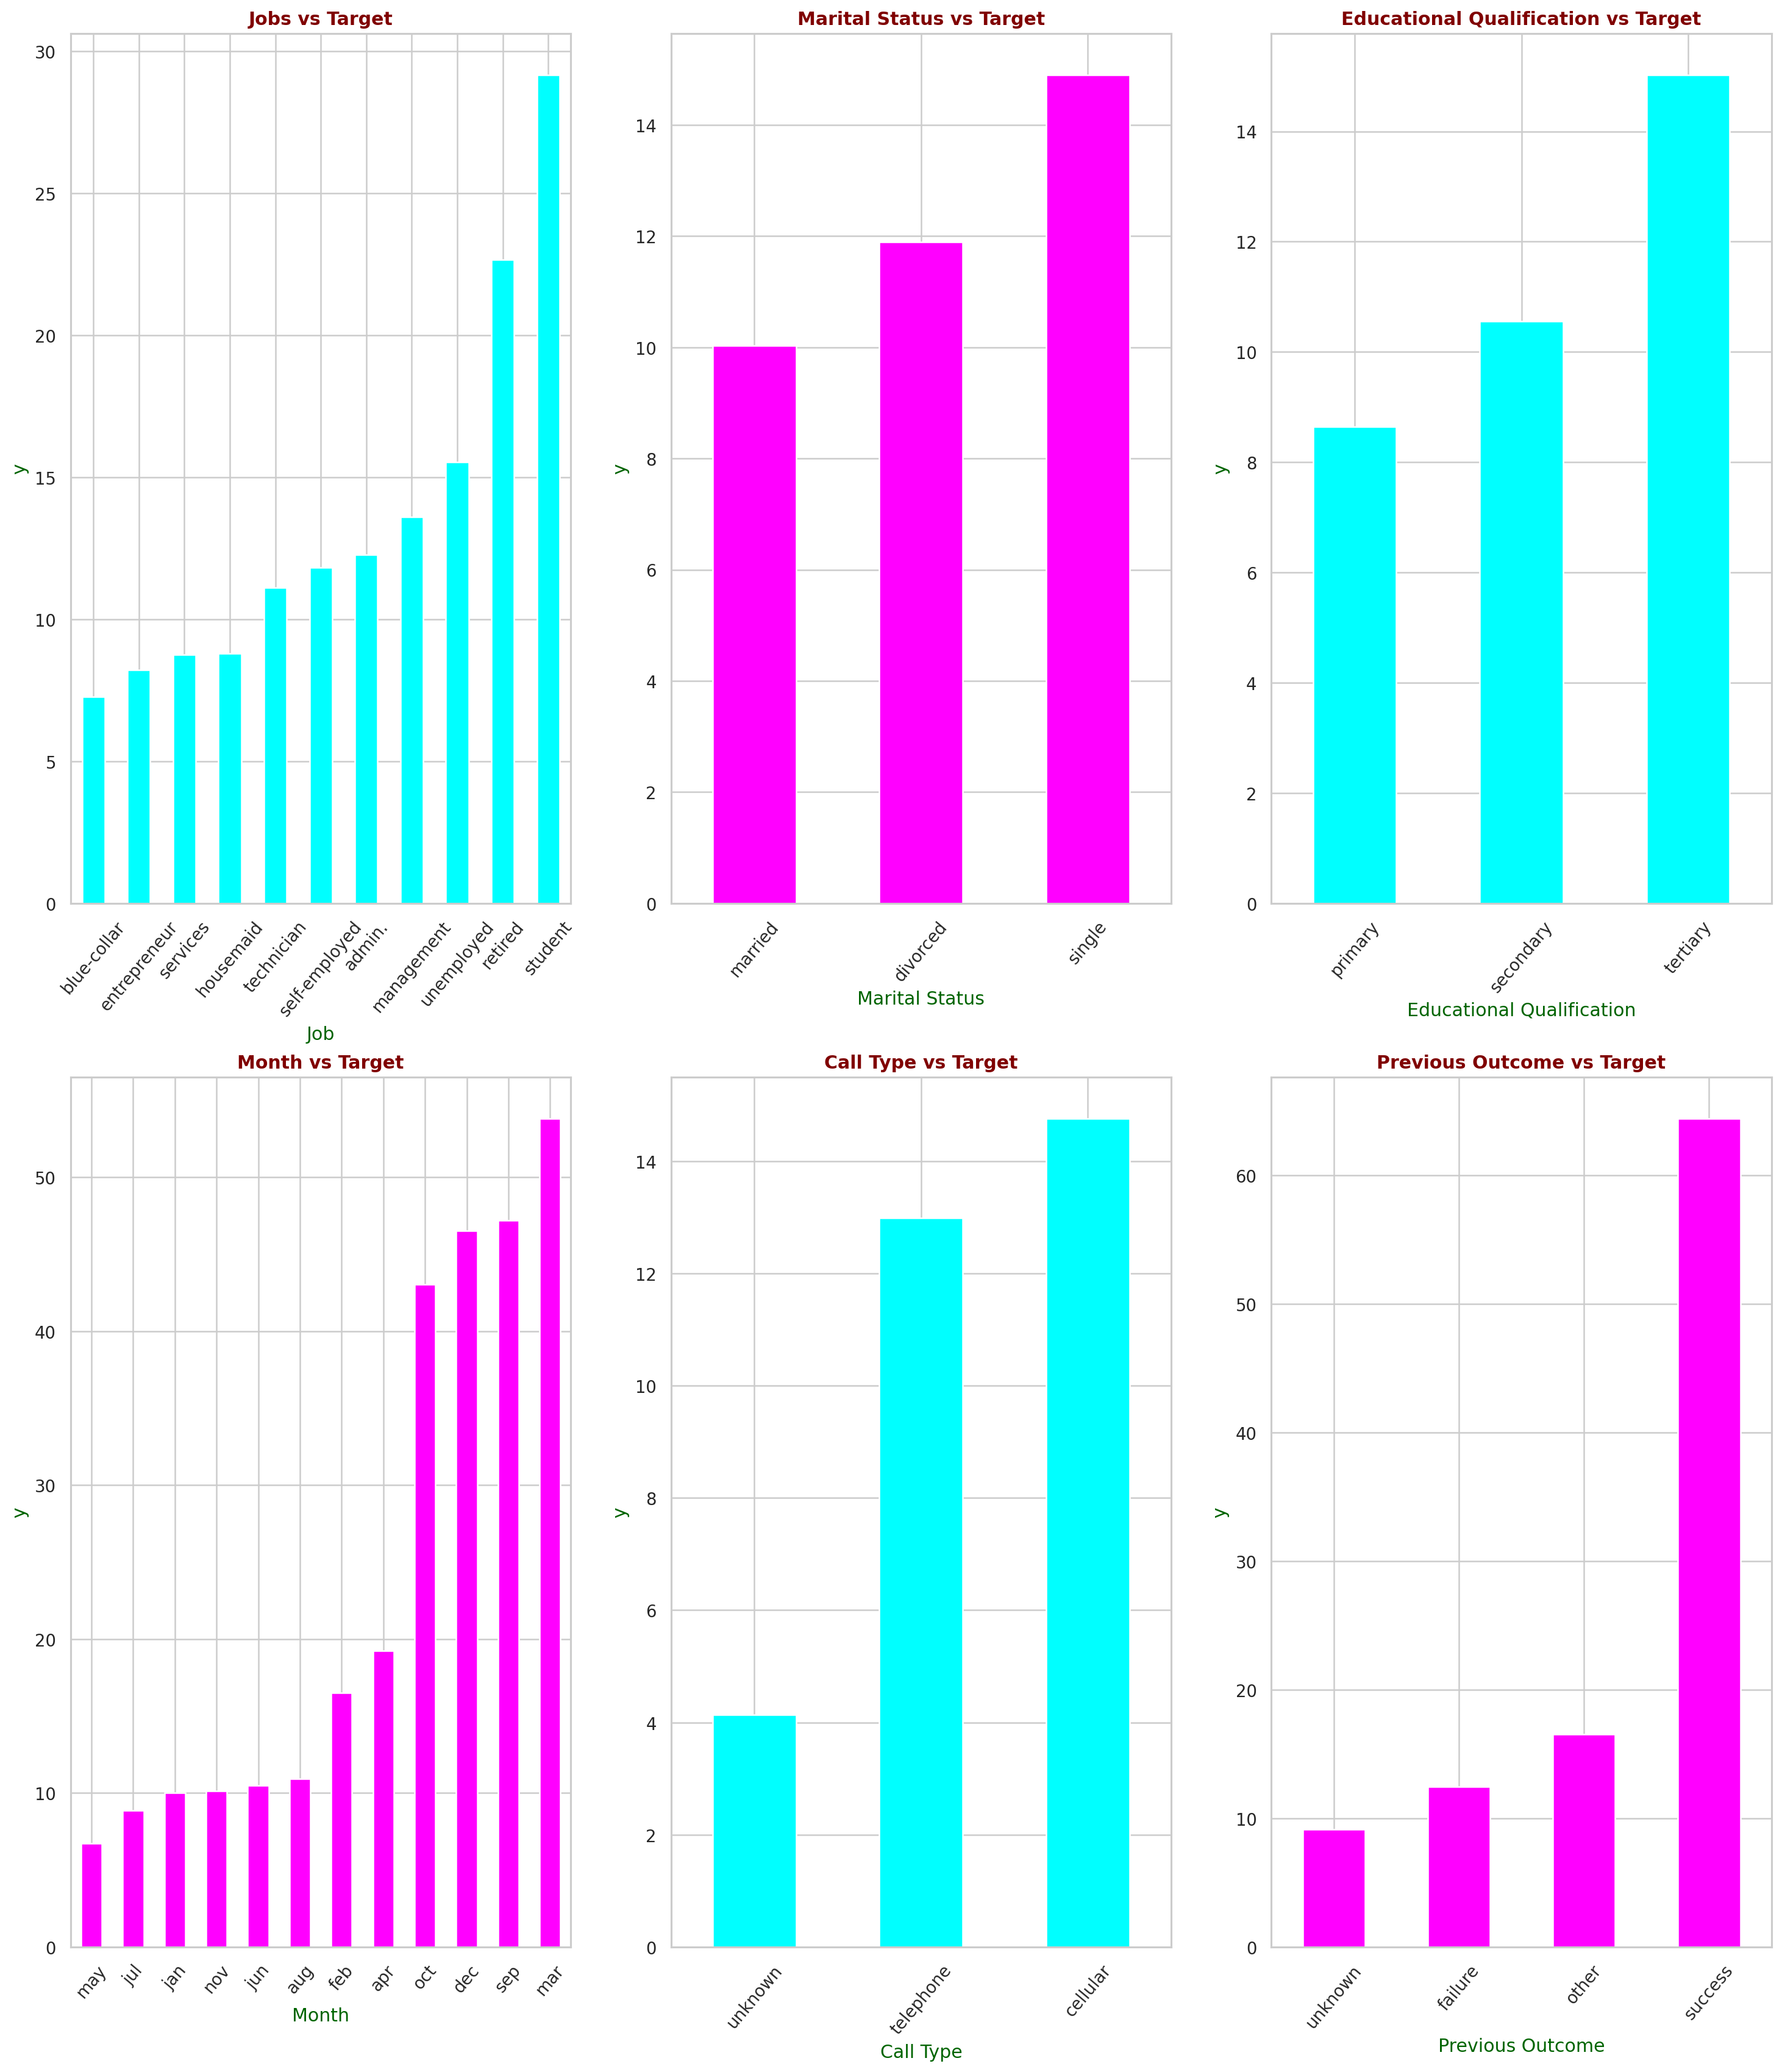

In [358]:
plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')

#Jobs vs Target
plt.subplot(3,3,1)
(df.groupby('job')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
(df.groupby('marital')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
(df.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
(df.groupby('mon')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,5)
(df.groupby('call_type')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,6)
(df.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon')
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')


plt.show()

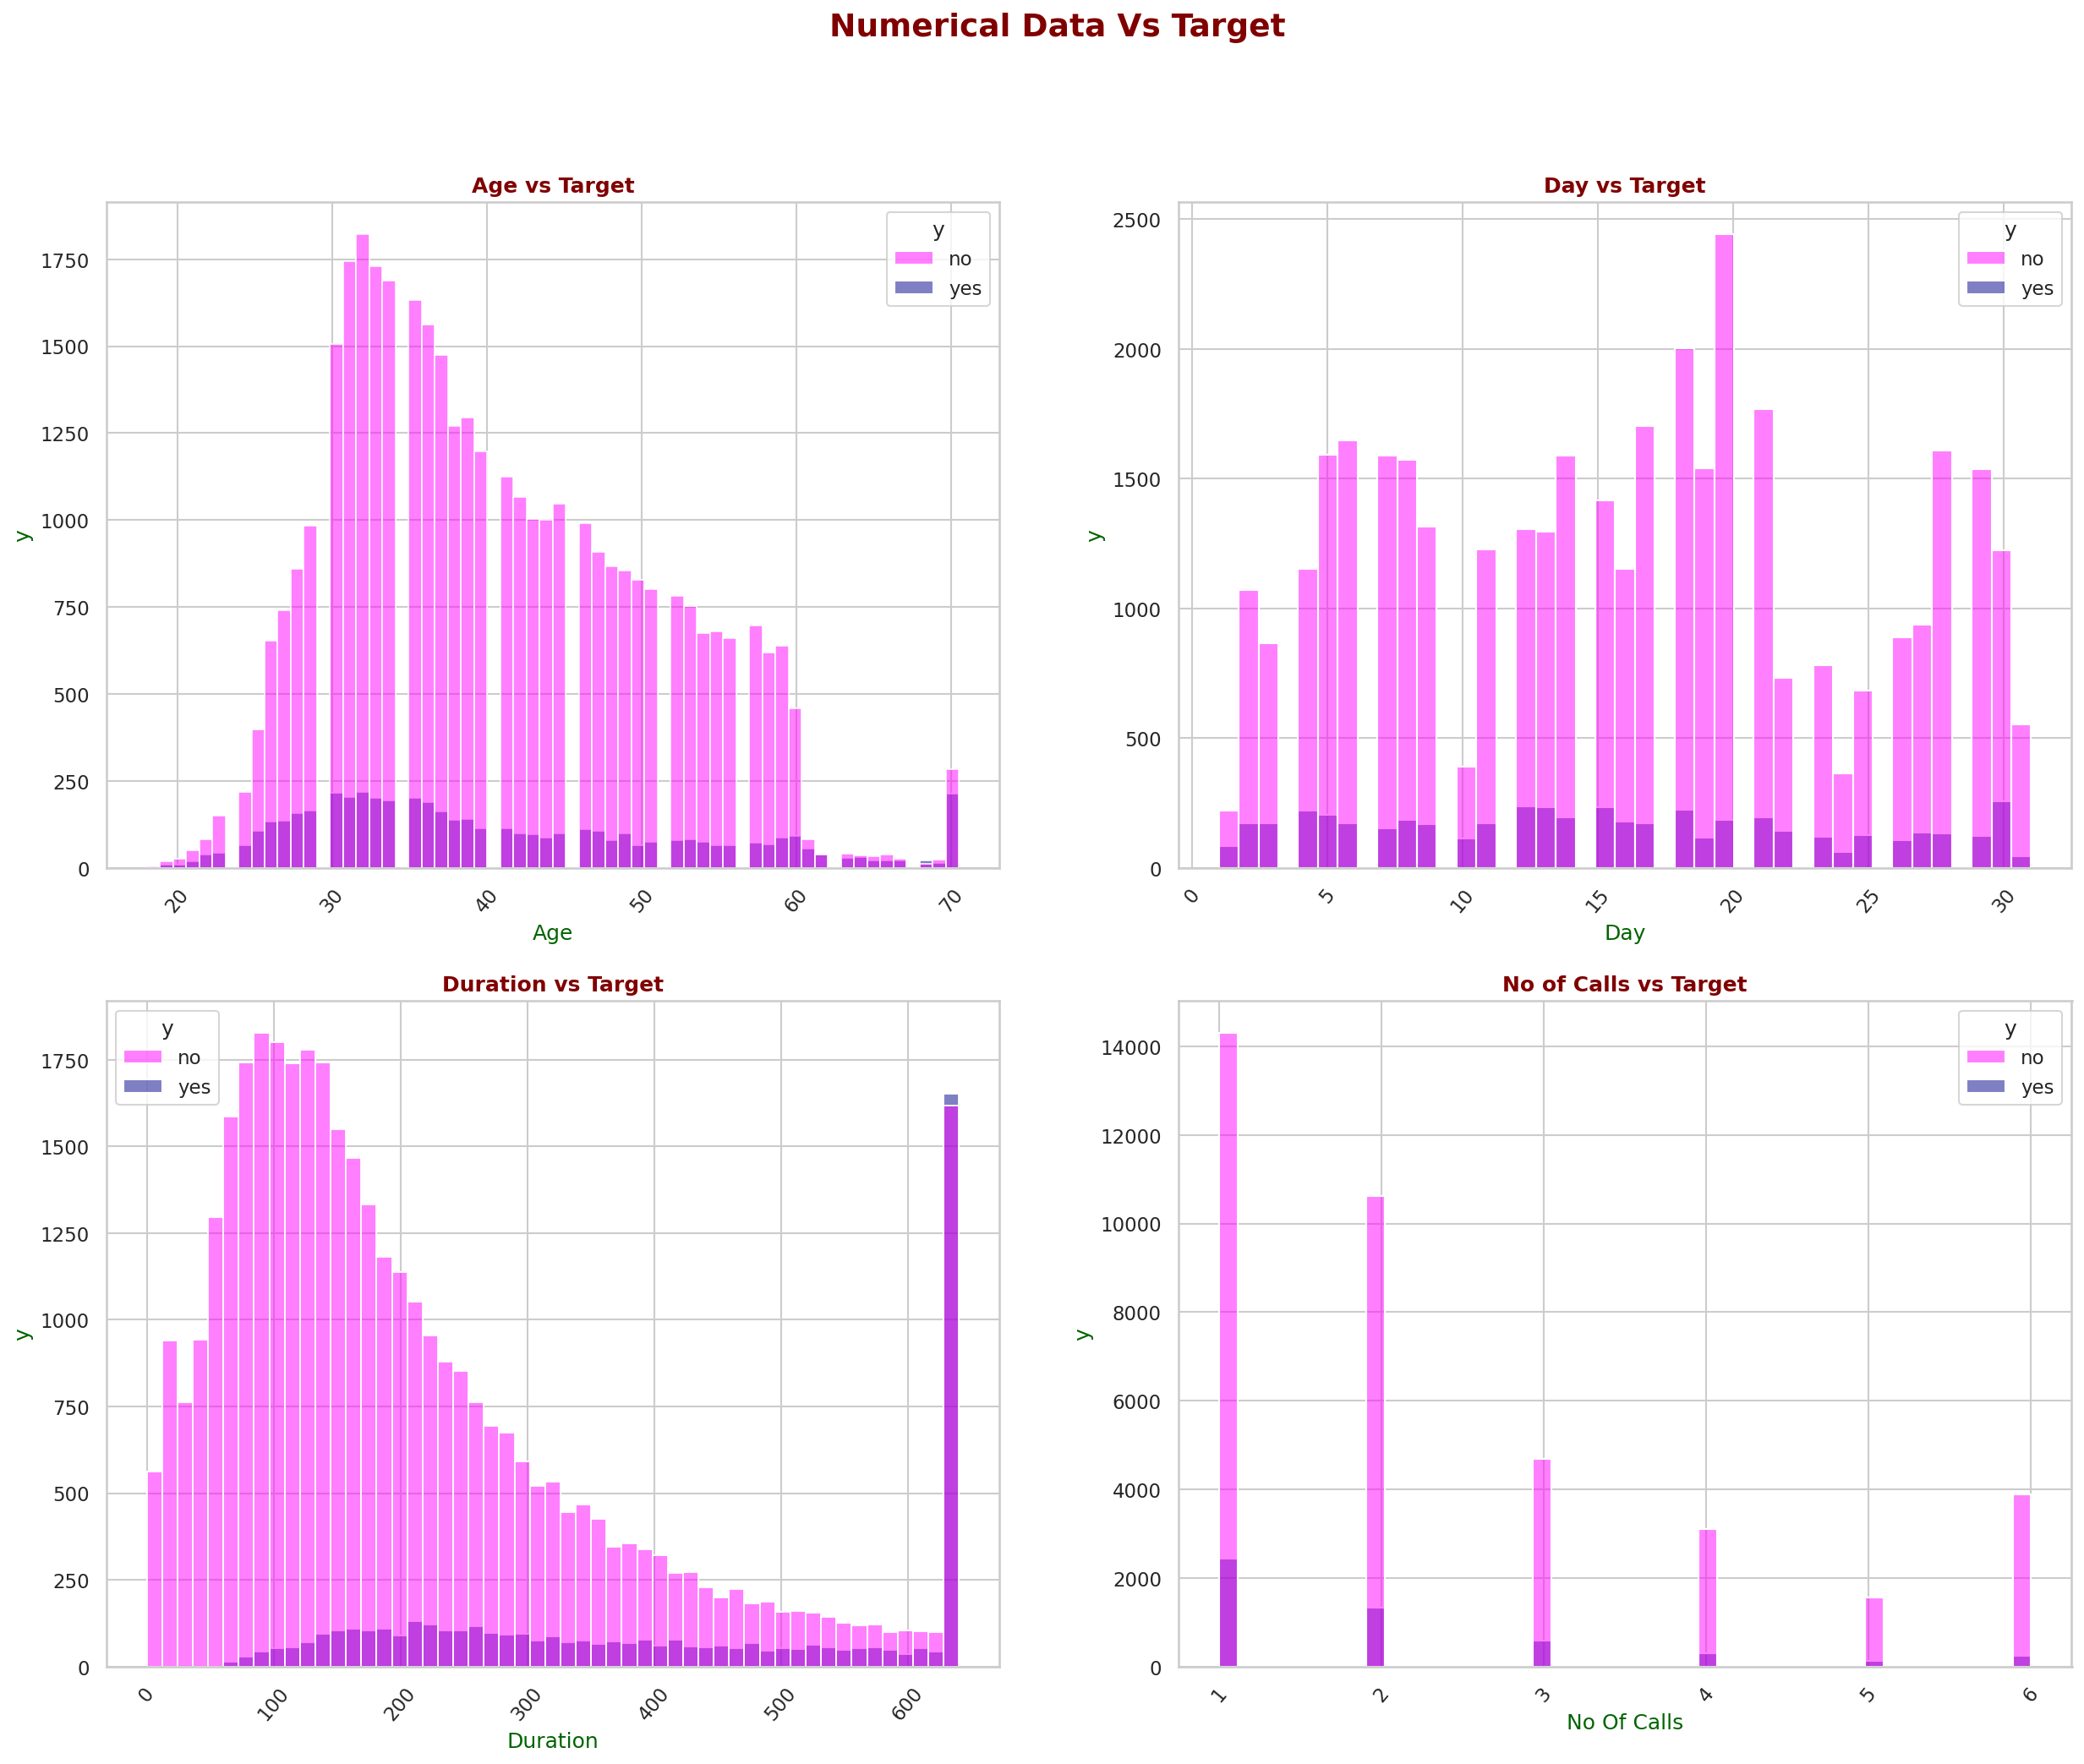

In [359]:
plt.figure(figsize=(20, 15), dpi=150)
#sub title to show title for overall plot
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon')

#Age vs Target
plt.subplot(2,2,1)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='age',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Age', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['age','target']].corr()

#Day vs Target
plt.subplot(2,2,2)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='day',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Day vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Day', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['day','target']].corr()

#Duration vs Target
plt.subplot(2,2,3)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='dur',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Duration vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Duration', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#No of Calls vs Target
plt.subplot(2,2,4)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='num_calls',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('No of Calls vs Target', fontweight='bold', color='maroon' )
plt.xlabel('No Of Calls', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()

# Encoding

In [360]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

job column:

In [361]:
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,married,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,single,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,married,secondary,unknown,5,may,76.0,1,unknown,no,0


Marital Status column:

In [362]:
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,3,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,1,secondary,unknown,5,may,76.0,1,unknown,no,0


Educational qualification column:

In [363]:
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,3,2,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,1,2,unknown,5,may,76.0,1,unknown,no,0


Month column

In [364]:
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,1,261.0,1,unknown,no,0
1,44.0,5,3,2,unknown,5,1,151.0,1,unknown,no,0
2,33.0,2,1,2,unknown,5,1,76.0,1,unknown,no,0


Call type column:

In [365]:
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,unknown,no,0
1,44.0,5,3,2,1,5,1,151.0,1,unknown,no,0
2,33.0,2,1,2,1,5,1,76.0,1,unknown,no,0


previous outcome column:

In [366]:
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,1,no,0
1,44.0,5,3,2,1,5,1,151.0,1,1,no,0
2,33.0,2,1,2,1,5,1,76.0,1,1,no,0


# Splitting, Balancing and Scaling the data to be used in ML models

In [367]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [368]:
x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['target'].values

In [369]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

In [370]:
#Balancing the data
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [371]:
print(len(x_train_smt))
print(len(y_train_smt))

52624
52624


In [372]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# Implementation of ML models

### Logistic regression

In [373]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)

0.7645288261171568

In [374]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.86962755, 0.13037245],
       [0.99158814, 0.00841186],
       [0.88983008, 0.11016992],
       ...,
       [0.2265084 , 0.7734916 ],
       [0.1465752 , 0.8534248 ],
       [0.97236068, 0.02763932]])

In [375]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auroc,2))

AUROC score for logistic regression  :   0.88


### KNN (K-Nearest Neighbours)

In [376]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt)
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))


K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8683719314621691
K value : 2 Train Score :  0.9951733049559136 Cross Value Accuracy : 0.888979282005064
K value : 3 Train Score :  0.9780138339920948 Cross Value Accuracy : 0.8846967404832411
K value : 4 Train Score :  0.9774627546366677 Cross Value Accuracy : 0.8925677814256898
K value : 5 Train Score :  0.9680564001216175 Cross Value Accuracy : 0.8903687073516158
K value : 6 Train Score :  0.9677143508665248 Cross Value Accuracy : 0.8936097163211878
K value : 7 Train Score :  0.961291425965339 Cross Value Accuracy : 0.8930315490751468
K value : 8 Train Score :  0.9611964122833688 Cross Value Accuracy : 0.8945353740182824
K value : 9 Train Score :  0.9569397993311036 Cross Value Accuracy : 0.8943036243079696
K value : 10 Train Score :  0.9558756460930374 Cross Value Accuracy : 0.8953458274322991
K value : 20 Train Score :  0.9406354515050167 Cross Value Accuracy : 0.8937251888330973
K value : 30 Train Score :  0.9341745211310428 

In [377]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))

KNN Score:  0.7934707108126882
AUROC on the sampled dataset :  0.5486151918893339


### Decision Tree

In [380]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [381]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier()
dt.fit(x_train_smt,y_train_smt)
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.7894715592535585


In [385]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth)
  # Fiting dt to the training set
  dt.fit(x_train_smt, y_train_smt)
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this isn't reliable information - i am printing the training accuracy check the difference between this and crossval
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet (for cross validation)
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7823806628154454  Cross val score :  0.8850428897901377
Depth  :  2  Training Accuracy :  0.8096685922772879  Cross val score :  0.8936105210076821
Depth  :  3  Training Accuracy :  0.8674369109151718  Cross val score :  0.895462775202781
Depth  :  4  Training Accuracy :  0.907190635451505  Cross val score :  0.895463177546028
Depth  :  5  Training Accuracy :  0.9163119489206446  Cross val score :  0.8965051124415263
Depth  :  6  Training Accuracy :  0.9308680449984797  Cross val score :  0.8944200356207889
Depth  :  7  Training Accuracy :  0.9376140164183643  Cross val score :  0.8934939755804472
Depth  :  8  Training Accuracy :  0.9458802067497719  Cross val score :  0.8919890777219862
Depth  :  9  Training Accuracy :  0.9548685010641532  Cross val score :  0.8909468745976566
Depth  :  10  Training Accuracy :  0.9637427789601702  Cross val score :  0.8915271876743487
Depth  :  20  Training Accuracy :  0.9992208878078443  Cross val score :  0.872771

In [383]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train_smt,y_train_smt)
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.9163119489206446
AUROC on the sampled dataset :  0.8639934084042846


### XGBoost

In [384]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(x_train_smt,y_train_smt)
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))


Learning rate :  0.01  Train score :  0.9437519002736394  Cross-Val score :  0.8911779537358913
Learning rate :  0.02  Train score :  0.9533292794162359  Cross-Val score :  0.8945355081326982
Learning rate :  0.03  Train score :  0.9603792946184251  Cross-Val score :  0.8981250804686495
Learning rate :  0.04  Train score :  0.9652059896625114  Cross-Val score :  0.8995139693575384
Learning rate :  0.05  Train score :  0.9687785041045911  Cross-Val score :  0.9000932095189048
Learning rate :  0.1  Train score :  0.9780518394648829  Cross-Val score :  0.8995138352431227
Learning rate :  0.11  Train score :  0.9789259653390088  Cross-Val score :  0.8993986309600446
Learning rate :  0.12  Train score :  0.9793820310124658  Cross-Val score :  0.8962722898158878
Learning rate :  0.13  Train score :  0.9797430830039525  Cross-Val score :  0.8999770664349172
Learning rate :  0.14  Train score :  0.9808262389784129  Cross-Val score :  0.8981253486974807
Learning rate :  0.15  Train score :  0.9

### Random forest

In [386]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [387]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")
  rf.fit(x_train, y_train)
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9992208878078443  Cross val score :  0.8834119714385553
Depth  :  2  Training Accuracy :  0.9992208878078443  Cross val score :  0.8853512151016
Depth  :  3  Training Accuracy :  0.9992208878078443  Cross val score :  0.8905901251679087
Depth  :  4  Training Accuracy :  0.9992208878078443  Cross val score :  0.8947002028730715
Depth  :  5  Training Accuracy :  0.9992208878078443  Cross val score :  0.8972183261169959
Depth  :  6  Training Accuracy :  0.9992208878078443  Cross val score :  0.8991865384792648
Depth  :  7  Training Accuracy :  0.9992208878078443  Cross val score :  0.9022546480223437
Depth  :  8  Training Accuracy :  0.9992208878078443  Cross val score :  0.9028624963024476
Depth  :  9  Training Accuracy :  0.9992208878078443  Cross val score :  0.9051200688477966
Depth  :  10  Training Accuracy :  0.9992208878078443  Cross val score :  0.9042228352454463


**Therefore, The highest accuracy was achieved via random forest. with the final cross validation score of 0.90 accuracy**

# Feature importance

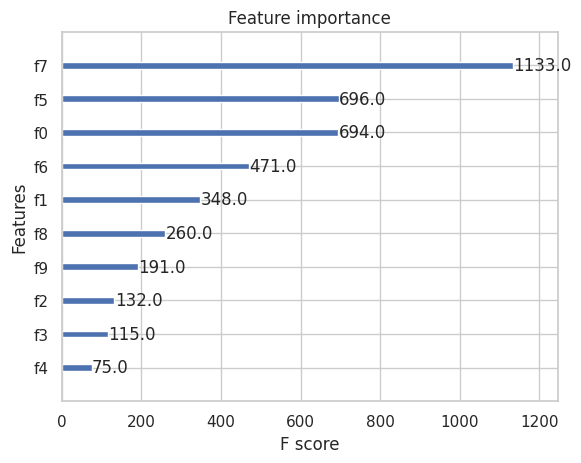

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [388]:
from xgboost import plot_importance

plot_importance(model)
plt.show()
df.columns

*where, features are indexed as f0=age, f1=job, f2= marital, etc.
Therefore, according to the feature importance plot, f7 is most effective i.e duration of the call.*



---

